# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [2]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [3]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

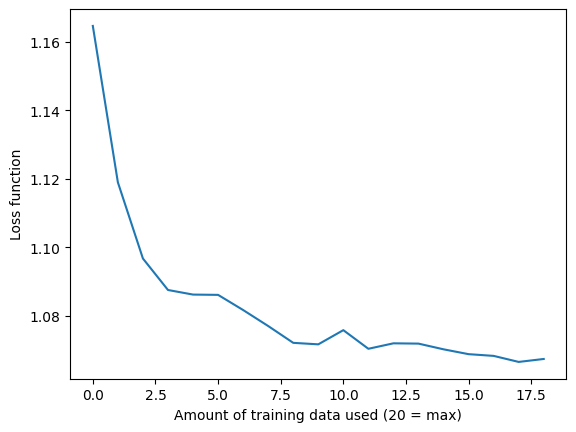

In [4]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [5]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

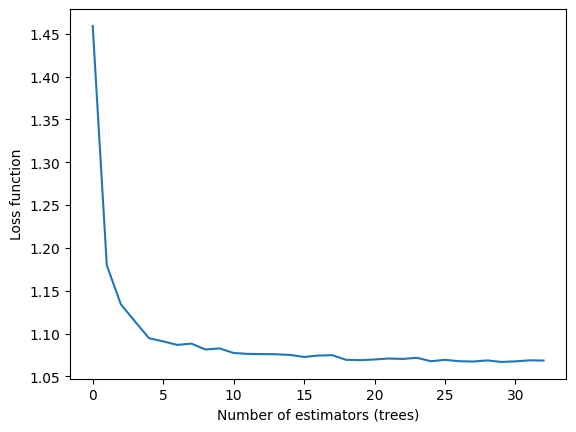

In [6]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

#### Dataset 1: Marketing Campaign Dataset

In [7]:
#load dataset
marketing_campaign = pd.read_csv("marketing_campaign.csv", sep=';')
marketing_campaign.dropna(inplace=True)
marketing_campaign = marketing_campaign.drop(columns=['Z_CostContact', 'Z_Revenue']) 
marketing_campaign.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,4,10,6,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,3,7,6,0,0,0,0,0,0,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,0,4,8,0,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,2,9,0,0,0,0,0,0,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,0,0,20,1,0,0,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#drop ID column
marketing_campaign = marketing_campaign.drop(columns=['ID'], errors='ignore')

#convert categorical variables
marketing_campaign = pd.get_dummies(marketing_campaign, drop_first=True)

#split into features and target
X = marketing_campaign.drop('Response', axis=1)
y = marketing_campaign['Response']

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

#fit random forest 
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#evaluate performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

#cross validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')
print("Cross-validated AUC:", cv_scores.mean())


[[376   1]
 [ 51  16]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       377
           1       0.94      0.24      0.38        67

    accuracy                           0.88       444
   macro avg       0.91      0.62      0.66       444
weighted avg       0.89      0.88      0.85       444

AUC Score: 0.8524486321707112
Cross-validated AUC: 0.8746232165009061


In [9]:
#hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                           param_grid, 
                           cv=5, 
                           scoring='roc_auc', 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best AUC score:", grid_search.best_score_)

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best AUC score: 0.8720363930524945


In [10]:
#final evaluation w/best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_best))
print("Final AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.88      0.99      0.94       377
           1       0.89      0.25      0.40        67

    accuracy                           0.88       444
   macro avg       0.89      0.62      0.67       444
weighted avg       0.88      0.88      0.85       444

Final AUC: 0.8800823468862583


#### Dataset 2: Digital Marketing Campaign Dataset


In [11]:
#load dataset:
dm_campaign = pd.read_csv('digital_marketing_campaign_dataset.csv')
dm_campaign.head(10)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
5,8005,25,Female,42925,Social Media,Awareness,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95,5,8,0,3316,IsConfid,ToolConfid,1
6,8006,38,Female,25615,Referral,Awareness,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54,14,3,6,930,IsConfid,ToolConfid,1
7,8007,56,Female,57083,Social Media,Conversion,5324.283667,0.052878,0.188946,48,2.626015,2.987817,96,9,3,0,2983,IsConfid,ToolConfid,1
8,8008,36,Female,140788,Email,Retention,9421.250951,0.023536,0.112585,13,5.472843,14.287421,73,4,8,5,460,IsConfid,ToolConfid,1
9,8009,40,Male,130764,Social Media,Awareness,6229.193333,0.066641,0.169786,22,1.135665,4.613312,14,8,4,8,3789,IsConfid,ToolConfid,1


In [12]:
#drop ID column
dm_campaign = dm_campaign.drop(columns=['CustomerID'], errors='ignore')

#convert categorical variables
dm_campaign = pd.get_dummies(dm_campaign, drop_first=True)

#split into features and target
X = dm_campaign.drop('Conversion', axis=1)
y = dm_campaign['Conversion']

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

#fit random forest 
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#evaluate performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

#cross validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')
print("Cross-validated AUC:", cv_scores.mean())

[[  23  175]
 [   6 1396]]
              precision    recall  f1-score   support

           0       0.79      0.12      0.20       198
           1       0.89      1.00      0.94      1402

    accuracy                           0.89      1600
   macro avg       0.84      0.56      0.57      1600
weighted avg       0.88      0.89      0.85      1600

AUC Score: 0.8118993069064395
Cross-validated AUC: 0.8164622359487372


In [13]:
#hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                           param_grid, 
                           cv=5, 
                           scoring='roc_auc', 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best AUC score:", grid_search.best_score_)

Best parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Best AUC score: 0.8239660190888785


In [14]:
#final evaluation w/best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_best))
print("Final AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       1.00      0.02      0.03       198
           1       0.88      1.00      0.93      1402

    accuracy                           0.88      1600
   macro avg       0.94      0.51      0.48      1600
weighted avg       0.89      0.88      0.82      1600

Final AUC: 0.8107681666882809


#### Dataset 3: Customer Churn Dataset


In [15]:
train_cc = pd.read_csv('customer_churn_dataset-training-master.csv')
test_cc = pd.read_csv('customer_churn_dataset-testing-master.csv')
customer_churn = pd.concat([train_cc, test_cc], ignore_index=True)

In [16]:
#drop rows where churn is NaN
train_cc = train_cc.dropna(subset=['Churn'])
test_cc = test_cc.dropna(subset=['Churn'])

#split into features and target
X_train = train_cc.drop(columns=['Churn', 'CustomerID'])
y_train = train_cc['Churn']

X_test = test_cc.drop(columns=['Churn', 'CustomerID'])
y_test = test_cc['Churn']

#one-hot encode both train and test with aligned columns
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

#align the test set's columns to the train set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

#train rf
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

#evaluate
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

#cv
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Accuracy: 0.503464131481654

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.73      0.53      0.38     64374
weighted avg       0.75      0.50      0.37     64374


Confusion Matrix:
 [[ 1960 31921]
 [   43 30450]]
Cross-validation scores: [0.99963705 0.99960303 0.9997051  0.99960302 0.99950094]
Mean CV accuracy: 0.9996098286412483


In [18]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=4,                # test just 4 combinations
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best AUC score:", random_search.best_score_)

Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
Best AUC score: 0.9999996213994187


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
#final evaluation w/best model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]  # for ROC AUC
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5034485972597632
Precision: 0.48819945486612154
Recall: 0.9985570458793821
F1 Score: 0.6557832505949625
ROC AUC: 0.6042270538182316

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.73      0.53      0.38     64374
weighted avg       0.75      0.50      0.37     64374



# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

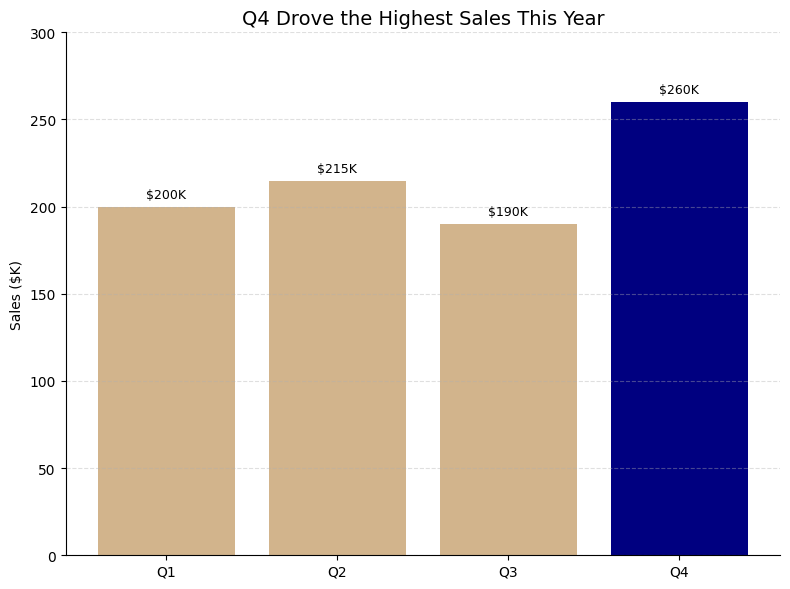

In [22]:
import matplotlib.pyplot as plt

#mock data: sales by quarter
quarters = ["Q1", "Q2", "Q3", "Q4"]
sales = [200, 215, 190, 260]
highlight_index = 3  #highlight Q4

#colors
colors = ['tan'] * len(sales)
colors[highlight_index] = 'navy'

#plot
plt.figure(figsize=(8, 6))
bars = plt.bar(quarters, sales, color=colors)

#add direct labels above bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             f"${sales[i]}K", ha='center', fontsize=9)

plt.title("Q4 Drove the Highest Sales This Year", fontsize=14)
plt.ylabel("Sales ($K)")
plt.ylim(0, 300)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()
